# Part 3: Prediction Of Amputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Get the Prediction Severe Injury dataset
link = 'https://drive.google.com/file/d/1mU3H0ePJk3jPSMcm3qlbww_-Mq-c3zeX/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Prediction Dataset.csv')

data = pd.read_csv('Prediction Dataset.csv')

In [4]:
# Amputation
data2 = data.copy()
data2.drop('Hospitalized_binary',axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77172 entries, 0 to 77171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                77172 non-null  float64
 1   Primary NAICS      77172 non-null  int64  
 2   Nature             77172 non-null  int64  
 3   Part of Body       77172 non-null  int64  
 4   Event              77172 non-null  int64  
 5   Source             77172 non-null  int64  
 6   Event Day          77172 non-null  int64  
 7   Event Month        77172 non-null  int64  
 8   Event Year         77172 non-null  int64  
 9   Amputation_binary  77172 non-null  float64
 10  City_ID            77172 non-null  int64  
 11  State_ID           77172 non-null  int64  
 12  Employer_ID        77172 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.7 MB


# 5. Prediction of Amputation

## 5.1 Train Valid Test Split

**Train Dataset:**

Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model

**Valid Dataset:**

Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

**Test Dataset:**

Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset.

In [5]:
%pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 461.5 kB/s eta 0:00:00


In [6]:
# Train, Validation & Test Split
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data2, target = 'Amputation_binary',
                                                                            train_size=0.7, valid_size=0.1, test_size=0.2,
                                                                           random_state=101)
print('Train Dataset Shape:')
print(X_train.shape), print(y_train.shape)
print('Validation Dataset Shape:')
print(X_valid.shape), print(y_valid.shape)
print('Test Dataset Shape:')
print(X_test.shape), print(y_test.shape)

Train Dataset Shape:
(54020, 12)
(54020,)
Validation Dataset Shape:
(7717, 12)
(7717,)
Test Dataset Shape:
(15435, 12)
(15435,)


(None, None)

## 5.2 Modeling To Obtain Hyperparameters On Imbalanced Dataset

### 5.2.1 Decision Tree

In [7]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(8,6))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' Feature Importance')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

Score:
 0.983672411558896 

Confusion Matrix:
 [[5597   59]
 [  67 1994]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5656
         1.0       0.97      0.97      0.97      2061

    accuracy                           0.98      7717
   macro avg       0.98      0.98      0.98      7717
weighted avg       0.98      0.98      0.98      7717



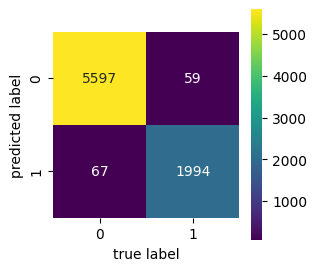

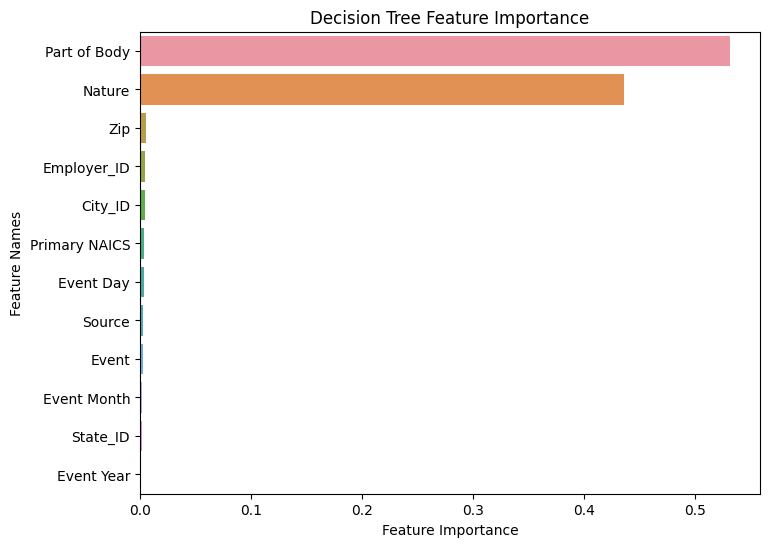

In [ ]:
# Create model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

# Train model
dt.fit(X_train,y_train)

# Prediction
dt_pred = dt.predict(X_valid)

# Evaluation
print('Score:\n',dt.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(dt.feature_importances_,X_train.columns,'Decision Tree')

#### 5.2.1.1 Hyperparameters For Decision Tree

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.986 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.984 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.985 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.980 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.980 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.981 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.986 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.985 total time=   0.3s
[CV 3/3] END criterion=gini, max_dep

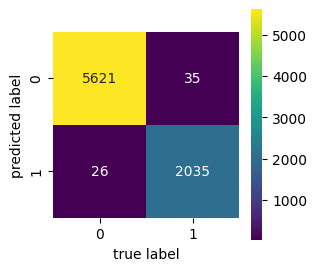

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {'max_depth': [None, 1, 2, 3], 'min_samples_leaf': [1, 2, 3, 4] , 'criterion':['gini','entropy'],'splitter':['best', 'random']}

# Create a GridSearchCV object with the model and parameter grid
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
dt_grid_search.fit(X_train, y_train)

# Best parameters
best_params = dt_grid_search.best_params_

# Best model with optimized parameters
best_model = dt_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
dt_pred = dt_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',dt_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.2 Random Forests

Score:
 0.9920953738499417 

Confusion Matrix:
 [[5621   35]
 [  26 2035]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



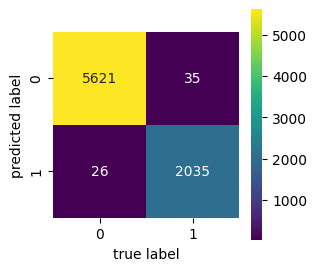

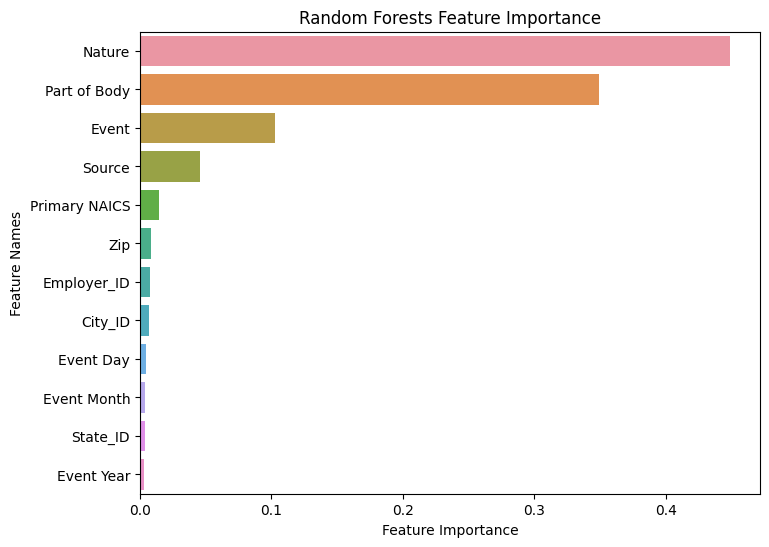

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=101)

# Train model
rf.fit(X_train,y_train)

# Prediction
rf_pred = rf.predict(X_valid)

# Evaluation
print('Score:\n',rf.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(rf.feature_importances_,X_train.columns,'Random Forests')

#### 5.2.2.1 Hyper Parameters For Random Forests

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.993 total time=   5.5s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.993 total time=   5.3s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.993 total time=   6.1s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.993 total time=  11.4s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.993 total time=  11.3s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.993 total time=  13.2s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.993 total time=  18.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.993 total time=  16.9s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.993 total time=  17.7s
[CV 1/3] END max_depth=None, min_samples_leaf=2

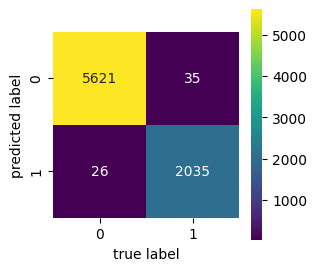

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'min_samples_leaf': [1, 2, 3, 4],
}

# Create a GridSearchCV object with the model and parameter grid
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
rf_grid_search.fit(X_train, y_train)

# Best parameters
best_params = rf_grid_search.best_params_

# Best model with optimized parameters
best_model = rf_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
rf_pred = rf_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',rf_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.3 Support Vector Machine (SVM)

Score:
 0.6965141894518595 

Confusion Matrix:
 [[5347  309]
 [2033   28]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      5656
         1.0       0.08      0.01      0.02      2061

    accuracy                           0.70      7717
   macro avg       0.40      0.48      0.42      7717
weighted avg       0.55      0.70      0.61      7717



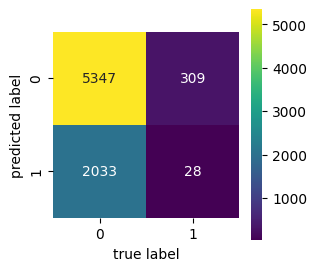

In [ ]:
# Create model
from sklearn.svm import SVC
svm = SVC(random_state=101)

# Train model
svm.fit(X_train,y_train)

# Prediction
svm_pred = svm.predict(X_valid)

# Evaluation
print('Score:\n',svm.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.2.3.1 Hyperparameters For Support Vector Machine

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=1.0;, score=0.714 total time= 1.2min
[CV 2/3] END .............................C=1.0;, score=0.713 total time= 1.2min
[CV 3/3] END .............................C=1.0;, score=0.709 total time= 1.1min
[CV 1/3] END ...........................C=100.0;, score=0.872 total time= 1.0min
[CV 2/3] END ...........................C=100.0;, score=0.874 total time= 1.0min
[CV 3/3] END ...........................C=100.0;, score=0.871 total time=  58.8s
[CV 1/3] END ..........................C=1000.0;, score=0.892 total time= 1.5min
[CV 2/3] END ..........................C=1000.0;, score=0.894 total time= 1.4min
[CV 3/3] END ..........................C=1000.0;, score=0.895 total time= 1.4min
Best Parameters: {'C': 1000.0}
Best Model: SVC(C=1000.0, random_state=101)
Score:
 0.8984061163664636 

Confusion Matrix:
 [[5155  501]
 [ 283 1778]] 

Classification Report:
               precision    recall  f

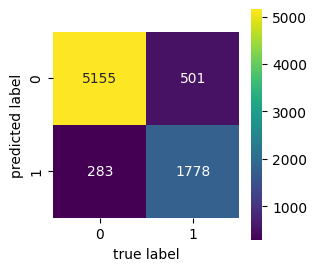

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_model = SVC(random_state=101)

# Define the parameter grid for search
param_grid = {
    'C': [1.0, 100.0, 1000.0],
}

# Create a GridSearchCV object with the model and parameter grid
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
svm_grid_search.fit(X_train, y_train)

# Best parameters
best_params = svm_grid_search.best_params_

# Best model with optimized parameters
best_model = svm_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
svm_pred = svm_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',svm_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.4 Gaussian Naive Bayes

Number of mislabeled points out of a total 7717 points : 239
Score:
 0.9690294155760011 

Confusion Matrix:
 [[5580   76]
 [ 163 1898]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5656
         1.0       0.96      0.92      0.94      2061

    accuracy                           0.97      7717
   macro avg       0.97      0.95      0.96      7717
weighted avg       0.97      0.97      0.97      7717



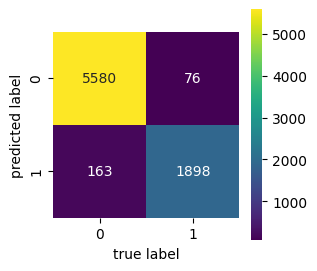

In [ ]:
# Create model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train model
gnb.fit(X_train, y_train)

# Prediction
gnb_pred = gnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != gnb_pred).sum()))

print('Score:\n',gnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.5 Bernoulli Naive Bayes

Number of mislabeled points out of a total 7717 points : 2061
Score:
 0.7329273033562265 

Confusion Matrix:
 [[5656    0]
 [2061    0]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      5656
         1.0       0.00      0.00      0.00      2061

    accuracy                           0.73      7717
   macro avg       0.37      0.50      0.42      7717
weighted avg       0.54      0.73      0.62      7717



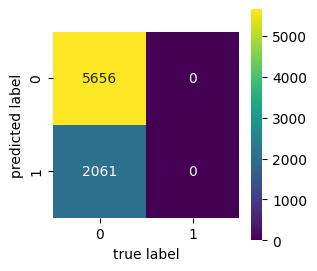

In [ ]:
# Create model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Train model
bnb.fit(X_train, y_train)

# Prediction
bnb_pred = bnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != bnb_pred).sum()))

print('Score:\n',bnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.2.5.1 Hyperparameters For Bernoulli Naive Bayes

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END .........alpha=1e-05, binarize=0.0;, score=0.738 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=0.0;, score=0.738 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=0.0;, score=0.738 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=0.5;, score=0.738 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=0.5;, score=0.738 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=0.5;, score=0.738 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=1.0;, score=0.738 total time=   0.0s
[CV 2/3] END .........alpha=1e-05, binarize=1.0;, score=0.738 total time=   0.0s
[CV 3/3] END .........alpha=1e-05, binarize=1.0;, score=0.738 total time=   0.0s
[CV 1/3] END .........alpha=1e-05, binarize=1.5;, score=0.738 total time=   0.1s
[CV 2/3] END .........alpha=1e-05, binarize=1.5;, score=0.738 total time=   0.1s
[CV 3/3] END .........alpha=1e-05, binarize=1.5

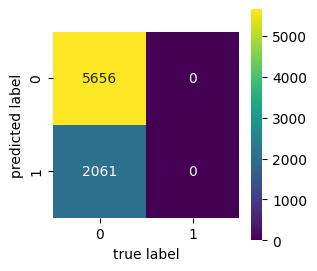

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()

# Define the parameter grid for search
param_grid = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1.0, 10.0, 100,1000], 'binarize': [0.0, 0.5, 1.0,1.5,2.0,None]}

# Create a GridSearchCV object with the model and parameter grid
bnb_grid_search = GridSearchCV(estimator=bnb_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bnb_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bnb_grid_search.best_params_

# Best model with optimized parameters
best_model = bnb_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bnb_pred = bnb_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',bnb_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.6 Bagging Classifier Algorithm

Score:
 0.9920953738499417 

Confusion Matrix:
 [[5621   35]
 [  26 2035]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



Text(8.222222222222223, 0.5, 'predicted label')

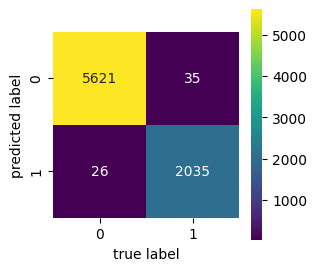

In [ ]:
# Create model
from sklearn.ensemble import BaggingClassifier
bca = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best'),random_state=101)

# Train model
bca.fit(X_train, y_train)

# Prediction
bca_pred = bca.predict(X_valid)

# Evaluation
print('Score:\n',bca.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 5.2.6.1 Hyperparameters For Bagging Classifier Algorithm

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   0.3s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   0.3s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   0.3s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   0.5s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   0.5s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   0.5s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   0.7s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   0.7s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   0.9s
[CV 1/3] END max_features=0.5, max_samples=0.7, n_estimators=10;, 

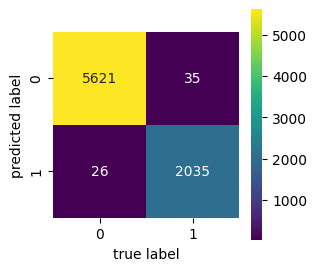

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base classifier
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, splitter='best',random_state=101)

# Create a Bagging Classifier
bca_model = BaggingClassifier(base_estimator=base_classifier,random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object with the model and parameter grid
bca_grid_search = GridSearchCV(estimator=bca_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bca_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bca_grid_search.best_params_

# Best model with optimized parameters
best_model = bca_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bca_pred = bca_grid_search.predict(X_valid)

# Evaluations
print('Score:\n',bca_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.7 Gradient Boosting Classifier Algorithm

Accuracy: 99.274%
Score:
 0.992743294026176 

Confusion Matrix:
 [[5621   35]
 [  21 2040]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



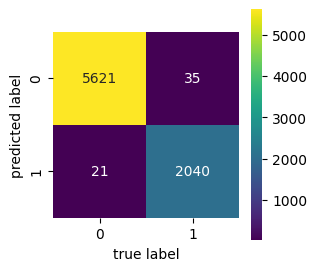

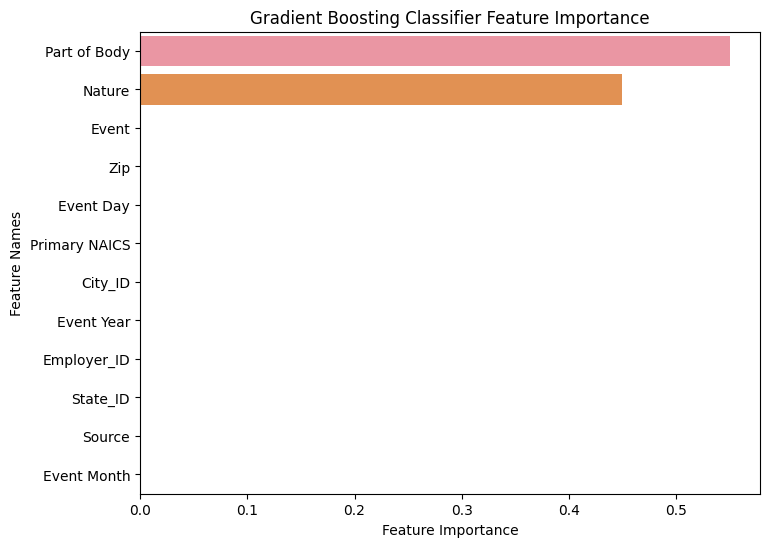

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions on the test data
gbc_pred = gbc.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',gbc.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

plot_feature_importance(gbc.feature_importances_,X_train.columns,'Gradient Boosting Classifier')

#### 5.2.7.1 Hyperparameters For Gradient Boosting Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   8.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   9.3s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   9.3s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=  17.7s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=  18.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=  24.6s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.992 total time=  27.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.993 total time=  26.9s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.993 total time=  27.4s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.992 total ti

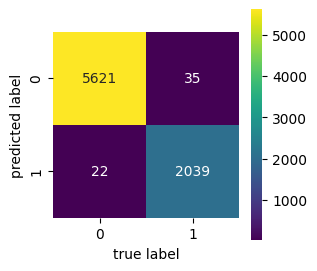

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search for parameter tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gb_grid_search.best_params_
best_score = gb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = GradientBoostingClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.8 XGboost Classifier

Accuracy: 99.261%
Score:
 0.9926137099909291 

Confusion Matrix:
 [[5621   35]
 [  22 2039]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



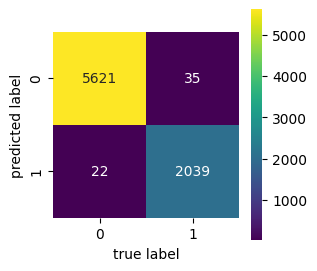

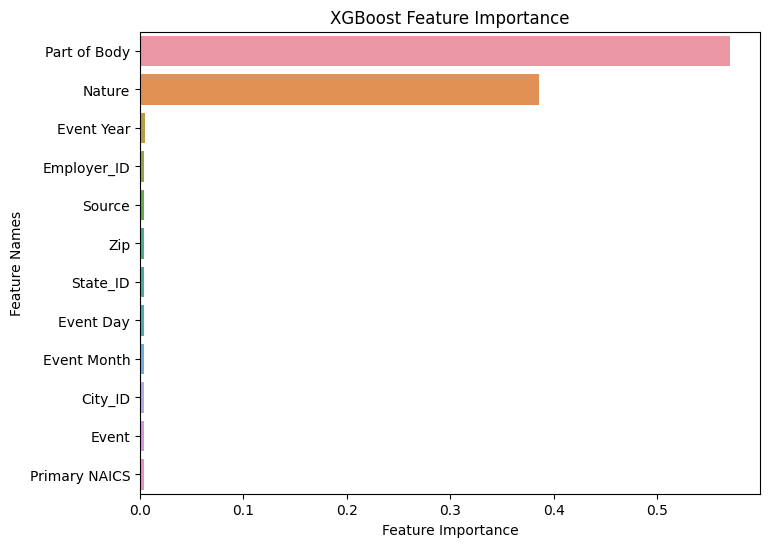

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb = xgb.XGBClassifier(random_state=101)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = xgb.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',xgb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBoost')

#### 5.2.8.1 Hyperparameters For XGboost Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   2.0s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   2.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.993 total time=   3.5s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=   3.8s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=   3.8s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.993 total time=   5.6s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.993 total time=   5.8s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.993 total time=   7.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.993 total time=   5.8s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.993 total ti

Text(8.222222222222223, 0.5, 'predicted label')

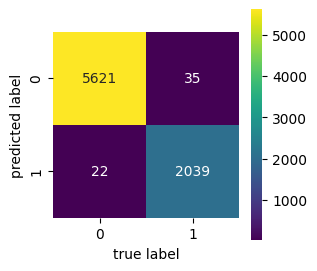

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for parameter tuning
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = xgb.XGBClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

### 5.2.9 K Nearest Neighbors (KNN)

Score:
 0.9437605287028638 

Confusion Matrix:
 [[5411  245]
 [ 189 1872]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      5656
         1.0       0.88      0.91      0.90      2061

    accuracy                           0.94      7717
   macro avg       0.93      0.93      0.93      7717
weighted avg       0.94      0.94      0.94      7717



Text(8.222222222222223, 0.5, 'predicted label')

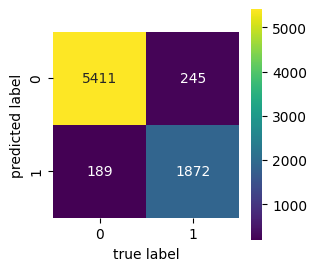

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label')

#### 5.2.9.1 Algorithm Optimization: Find Best K

Text(0, 0.5, 'ERROR RATE')

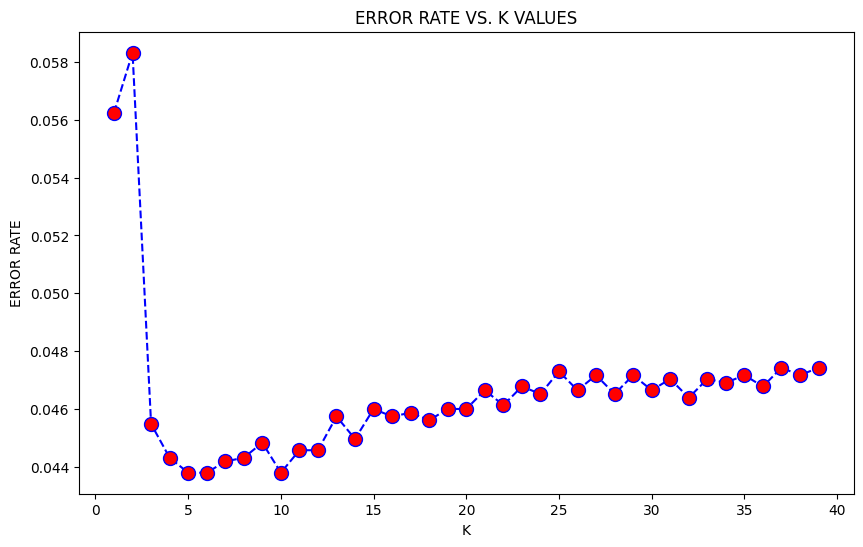

In [ ]:
# Optimize K
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_standard,y_train)
    pred_i = knn.predict(X_valid_standard)
    error_rate.append(np.mean(pred_i != y_valid))

# Plot error rate vs. K
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS. K VALUES')
plt.xlabel('K')
plt.ylabel('ERROR RATE')

Score:
 0.9556822599455747 

Confusion Matrix:
 [[5474  182]
 [ 160 1901]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      5656
         1.0       0.91      0.92      0.92      2061

    accuracy                           0.96      7717
   macro avg       0.94      0.95      0.94      7717
weighted avg       0.96      0.96      0.96      7717



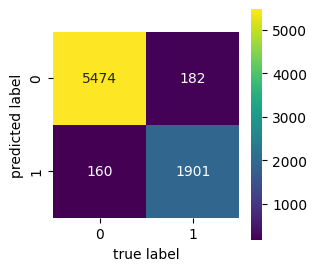

In [ ]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.10 Artificial Neural Networks (ANN)

Epoch 1/40
1689/1689 [==============================] - 6s 3ms/step - loss: 0.1389 - accuracy: 0.9514 - val_loss: 0.0858 - val_accuracy: 0.9719
Epoch 2/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9726 - val_loss: 0.0800 - val_accuracy: 0.9745
Epoch 3/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9763 - val_loss: 0.0757 - val_accuracy: 0.9778
Epoch 4/40
1689/1689 [==============================] - 4s 3ms/step - loss: 0.0757 - accuracy: 0.9786 - val_loss: 0.0741 - val_accuracy: 0.9799
Epoch 5/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9809 - val_loss: 0.0699 - val_accuracy: 0.9820
Epoch 6/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9827 - val_loss: 0.0699 - val_accuracy: 0.9786
Epoch 7/40
1689/1689 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9834 - val_loss: 0.0664 - val_accuracy:

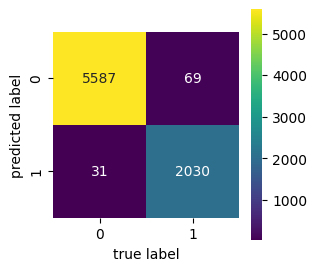

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_standard, y_train, epochs=40, batch_size=32, validation_data=(X_valid_standard, y_valid))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_standard, y_valid)
print("Loss:", loss)
print("Accuracy:", accuracy)

ann_pred = model.predict(X_valid_standard) # Prediction
ann_pred = [1 if i >= 0.5 else 0 for i in ann_pred] # Binary Prediction

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,ann_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,ann_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,ann_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

### 5.2.11 LightGBM

Accuracy: 0.9926137099909291
Confusion Matrix:
 [[5621   35]
 [  22 2039]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



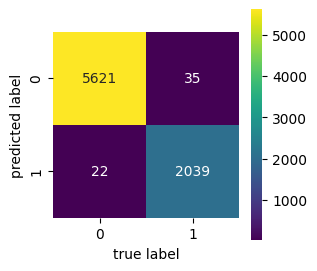

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Predict on the valid set
lgb_pred = model.predict(X_valid)
lgb_pred = np.round(lgb_pred)  # Convert probabilities to binary predictions

# Evaluations
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.2.11.1 Hyperparameters For LightGBM

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.993 total time=   0.5s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.993 total time=   0.6s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.993 total time=   0.5s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.993 total time=   0.6s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.993 total time=   0.6s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.993 total time=   0.7s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.993 total time=   0.9s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.993 total time=   0.9s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.993 total time=   0.9s
[CV 1/3] END boosting_type=gbdt, lea

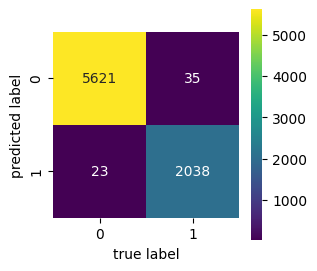

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Create the LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', **best_params)
best_model.fit(X_train, y_train)

# Predict on the valid set
lgb_pred = best_model.predict(X_valid)

# Evaluation
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.12 Logistic Regression

Score:
 0.8408708047168589 

Confusion Matrix:
 [[5032  624]
 [ 604 1457]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      5656
         1.0       0.70      0.71      0.70      2061

    accuracy                           0.84      7717
   macro avg       0.80      0.80      0.80      7717
weighted avg       0.84      0.84      0.84      7717



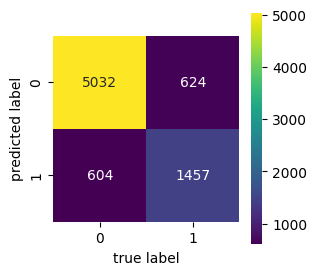

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)

# Train model
lr.fit(X_train,y_train)

# Pediction
lr_pred = lr.predict(X_valid)

# Evaluation
print('Score:\n',lr.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.2.12.1 Hyperparameters For Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.848 total time=   0.8s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.846 total time=   0.6s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.833 total time=   0.4s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.848 total time=   0.5s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.839 total time=   0.4s
[CV 3/3] END ................C=0.01, penalty=l2;

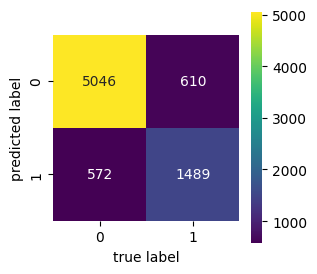

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid you want to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(random_state=101)

# Create an instance of GridSearchCV and fit it with your training data
grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the valid set
lr_pred = best_model.predict(X_valid)

# Evaluate of the model
accuracy = accuracy_score(y_valid, lr_pred)

# Print the best parameters, best score, and evaluations
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

## 5.3 Comparing Algorithms With Imbalanced Train Dataset

In [ ]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = SVC()
model_4 = GaussianNB()
model_5 = BernoulliNB()
model_6 = BaggingClassifier()
model_7 = GradientBoostingClassifier()
model_8 = xgb.XGBClassifier()
model_9 = KNeighborsClassifier()
model_10 = Sequential()
model_11 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
model_12 = LogisticRegression()

Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred


  fp, tp, th = roc_curve(y_valid, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_valid, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
6,GradientBoostingClassifier,0.992636,0.992614,0.991569,0.992621
7,XGBClassifier,0.992636,0.992614,0.991569,0.992621
10,LGBMClassifier,0.992504,0.992484,0.991326,0.992491
0,DecisionTreeClassifier,0.992110,0.992095,0.990598,0.992101
1,RandomForestClassifier,0.992110,0.992095,0.990598,0.992101
5,BaggingClassifier,0.992110,0.992095,0.990598,0.992101
9,Sequential,0.987176,0.987042,0.986380,0.987079
3,GaussianNB,0.968915,0.969029,0.953738,0.968814
8,KNeighborsClassifier,0.955850,0.955682,0.945095,0.955757
2,SVC,0.903146,0.898406,0.887055,0.899959


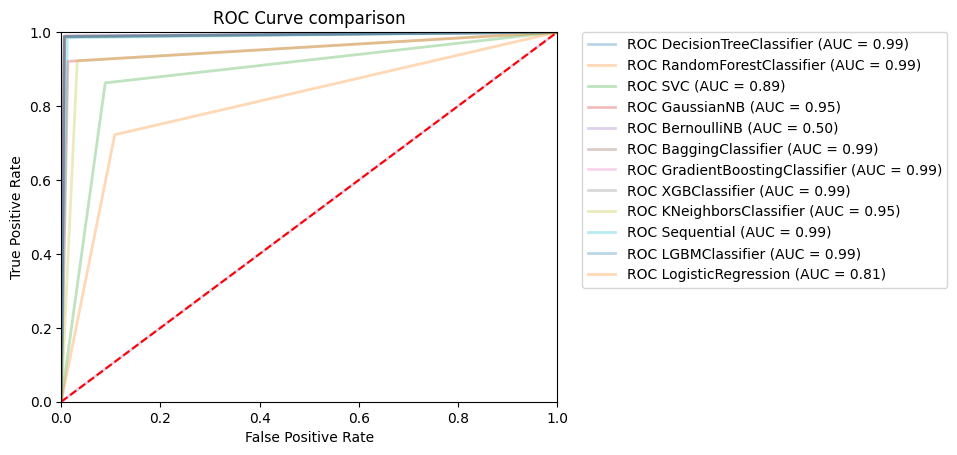

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred

  fp, tp, th = roc_curve(y_valid, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5.4 Balance Train Dataset: Hybrid Undersampling

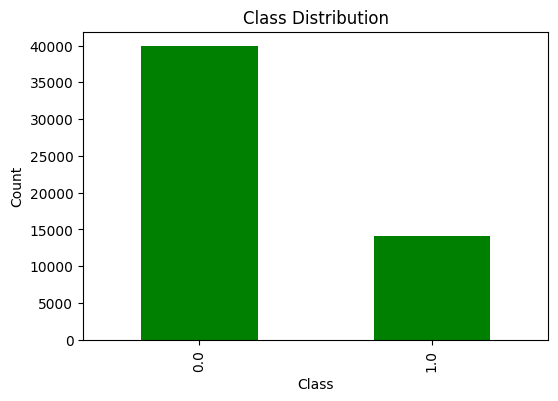

In [ ]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color='g')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Define the pipeline
pipeline = make_pipeline(
    RandomUnderSampler(),
    SMOTE(random_state=42)
)

# Apply the pipeline to the training data
X_train, y_train = pipeline.fit_resample(X_train, y_train)

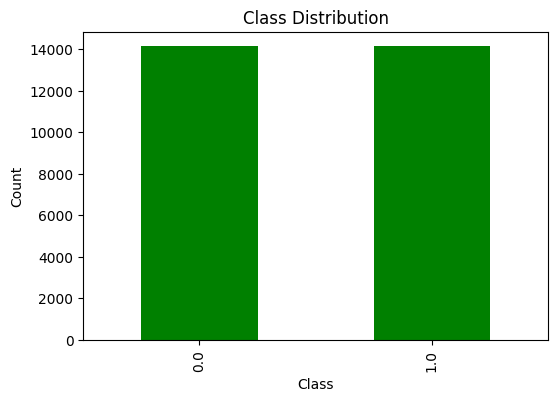

In [ ]:
# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color='g')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## 5.5 Prediction Amputation With Balanced Train Dataset

### 5.5.1 Decision Tree

Score:
 0.9818582350654399 

Confusion Matrix:
 [[5547  109]
 [  31 2030]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      5656
         1.0       0.95      0.98      0.97      2061

    accuracy                           0.98      7717
   macro avg       0.97      0.98      0.98      7717
weighted avg       0.98      0.98      0.98      7717



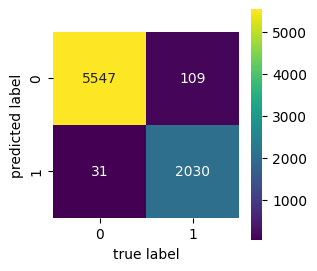

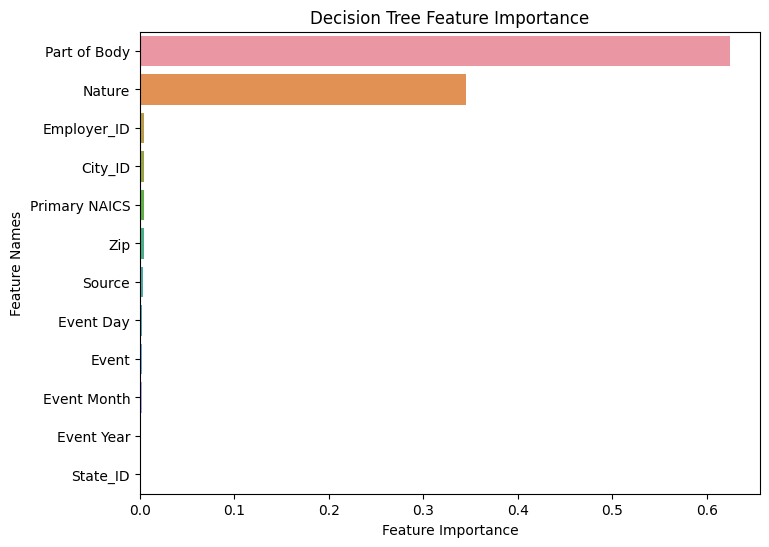

In [ ]:
# Create model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

# Train model
dt.fit(X_train,y_train)

# Prediction
dt_pred = dt.predict(X_valid)

# Evaluation
print('Score:\n',dt.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(dt.feature_importances_,X_train.columns,'Decision Tree')

#### 5.5.1.1 Hyperparameter For Decision Tree

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.983 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.981 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=best;, score=0.980 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.975 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.977 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, splitter=random;, score=0.981 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.985 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, splitter=best;, score=0.981 total time=   0.2s
[CV 3/3] END criterion=gini, max_dep

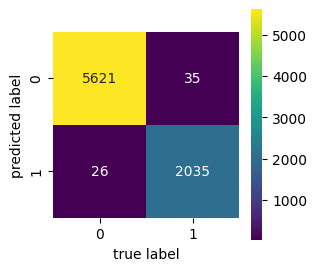

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {'max_depth': [None, 1, 2, 3], 'min_samples_leaf': [1, 2, 3, 4] , 'criterion':['gini','entropy'],'splitter':['best', 'random']}

# Create a GridSearchCV object with the model and parameter grid
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
dt_grid_search.fit(X_train, y_train)

# Best parameters
best_params = dt_grid_search.best_params_

# Best model with optimized parameters
best_model = dt_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
dt_pred = dt_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',dt_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,dt_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,dt_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,dt_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.2 Random Forests

Score:
 0.9922249578851885 

Confusion Matrix:
 [[5621   35]
 [  25 2036]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



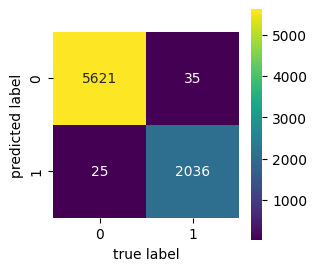

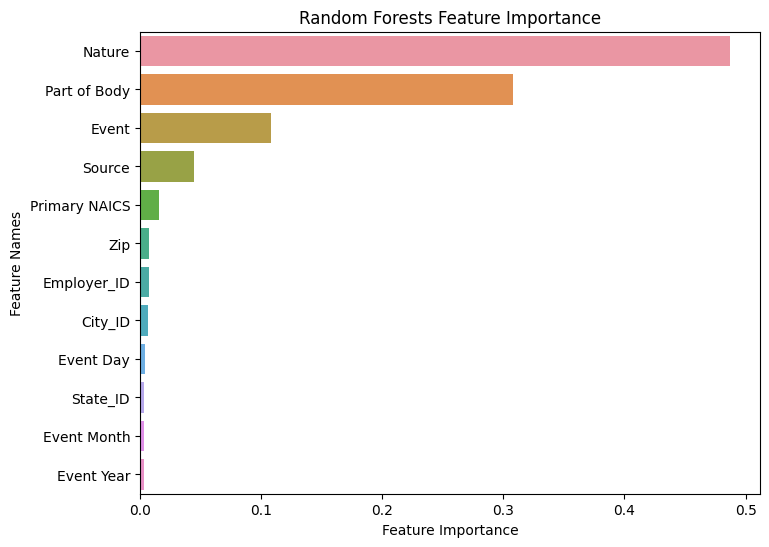

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=101)

# Train model
rf.fit(X_train,y_train)

# Prediction
rf_pred = rf.predict(X_valid)

# Evaluation
print('Score:\n',rf.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(rf.feature_importances_,X_train.columns,'Random Forests')

#### 5.5.2.1 Hyperparameters For Random Forests

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.992 total time=   2.9s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.991 total time=   2.8s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=100;, score=0.991 total time=   2.8s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.992 total time=   6.5s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.991 total time=   5.6s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=200;, score=0.991 total time=   6.5s
[CV 1/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.991 total time=   9.0s
[CV 2/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.991 total time=   8.8s
[CV 3/3] END max_depth=None, min_samples_leaf=1, n_estimators=300;, score=0.991 total time=   9.4s
[CV 1/3] END max_depth=None, min_samples_leaf=2

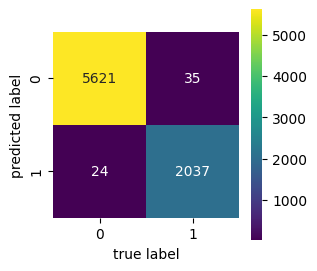

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create a GridSearchCV object with the model and parameter grid
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
rf_grid_search.fit(X_train, y_train)

# Best parameters
best_params = rf_grid_search.best_params_

# Best model with optimized parameters
best_model = rf_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
rf_pred = rf_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',rf_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,rf_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,rf_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,rf_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.3 Support Vector Machine (SVM)

Score:
 0.8509783594661138 

Confusion Matrix:
 [[4849  807]
 [ 343 1718]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      5656
         1.0       0.68      0.83      0.75      2061

    accuracy                           0.85      7717
   macro avg       0.81      0.85      0.82      7717
weighted avg       0.87      0.85      0.86      7717



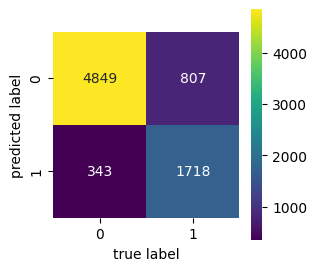

In [ ]:
# Create model
from sklearn.svm import SVC
svm = SVC(random_state=101)

# Train model
svm.fit(X_train,y_train)

# Prediction
svm_pred = svm.predict(X_valid)

# Evaluation
print('Score:\n',svm.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.3.1 Hyperparameters For Support Vector Machine Classification

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=1.0;, score=0.771 total time=  32.3s
[CV 2/3] END .............................C=1.0;, score=0.788 total time=  30.8s
[CV 3/3] END .............................C=1.0;, score=0.782 total time=  32.1s
[CV 1/3] END ...........................C=100.0;, score=0.888 total time=  33.8s
[CV 2/3] END ...........................C=100.0;, score=0.891 total time=  36.7s
[CV 3/3] END ...........................C=100.0;, score=0.898 total time=  35.4s
[CV 1/3] END ............................C=1000;, score=0.888 total time= 1.3min
[CV 2/3] END ............................C=1000;, score=0.891 total time= 1.3min
[CV 3/3] END ............................C=1000;, score=0.898 total time= 1.3min
Best Parameters: {'C': 100.0}
Best Model: SVC(C=100.0, random_state=101)
Score:
 0.876247246339251 

Confusion Matrix:
 [[4815  841]
 [ 114 1947]] 

Classification Report:
               precision    recall  f1-s

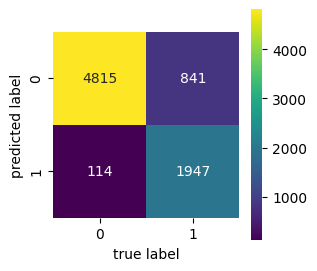

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_model = SVC(random_state=101)

# Define the parameter grid for search
param_grid = {
    'C': [1.0, 100.0, 1000],
}

# Create a GridSearchCV object with the model and parameter grid
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
svm_grid_search.fit(X_train, y_train)

# Best parameters
best_params = svm_grid_search.best_params_

# Best model with optimized parameters
best_model = svm_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
svm_pred = svm_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',svm_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,svm_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,svm_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,svm_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.4 Gaussian Naive Bayes

Number of mislabeled points out of a total 7717 points : 226
Score:
 0.9707140080342102 

Confusion Matrix:
 [[5575   81]
 [ 145 1916]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5656
         1.0       0.96      0.93      0.94      2061

    accuracy                           0.97      7717
   macro avg       0.97      0.96      0.96      7717
weighted avg       0.97      0.97      0.97      7717



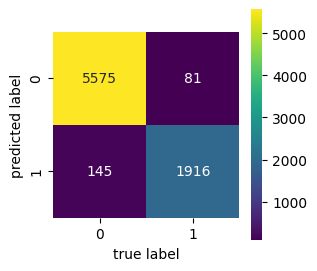

In [ ]:
# Create model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train model
gnb.fit(X_train, y_train)

# Prediction
gnb_pred = gnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != gnb_pred).sum()))

print('Score:\n',gnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.5 Bernoulli Naive Bayes

Number of mislabeled points out of a total 7717 points : 5468
Score:
 0.2914344952701827 

Confusion Matrix:
 [[ 282 5374]
 [  94 1967]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.05      0.09      5656
         1.0       0.27      0.95      0.42      2061

    accuracy                           0.29      7717
   macro avg       0.51      0.50      0.26      7717
weighted avg       0.62      0.29      0.18      7717



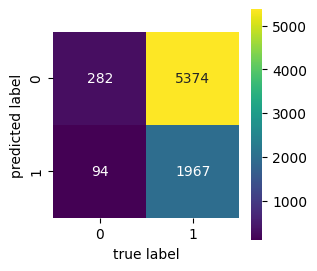

In [ ]:
# Create model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# Train model
bnb.fit(X_train, y_train)

# Prediction
bnb_pred = bnb.predict(X_valid)

# Evaluation
print("Number of mislabeled points out of a total %d points : %d" % (X_valid.shape[0], (y_valid != bnb_pred).sum()))

print('Score:\n',bnb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.5.1 Hyperparameters For Bernoulli Naive Bayes

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END ........alpha=0.0001, binarize=0.0;, score=0.500 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=0.0;, score=0.507 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=0.0;, score=0.505 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=0.5;, score=0.500 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=0.5;, score=0.507 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=0.5;, score=0.505 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=1.0;, score=0.513 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=1.0;, score=0.505 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=1.0;, score=0.504 total time=   0.0s
[CV 1/3] END ........alpha=0.0001, binarize=1.5;, score=0.513 total time=   0.0s
[CV 2/3] END ........alpha=0.0001, binarize=1.5;, score=0.505 total time=   0.0s
[CV 3/3] END ........alpha=0.0001, binarize=1.5

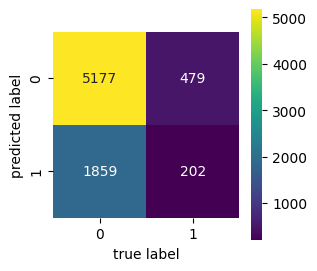

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()

# Define the parameter grid for search
param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1.0, 10.0, 100,1000,10000], 'binarize': [0.0, 0.5, 1.0,1.5,2,None]}

# Create a GridSearchCV object with the model and parameter grid
bnb_grid_search = GridSearchCV(estimator=bnb_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bnb_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bnb_grid_search.best_params_

# Best model with optimized parameters
best_model = bnb_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bnb_pred = bnb_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',bnb_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bnb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bnb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bnb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.6 Bagging Classifier Algorithm

Score:
 0.9920953738499417 

Confusion Matrix:
 [[5621   35]
 [  26 2035]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



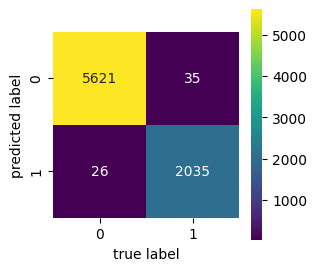

In [15]:
# Create model
from sklearn.ensemble import BaggingClassifier
bca = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, splitter='best'),random_state=101)

# Train model
bca.fit(X_train, y_train)

# Prediction
bca_pred = bca.predict(X_valid)

# Evaluation
print('Score:\n',bca.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.6.1 Hyperparameters For Bagging Classifier Algorithm

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   0.5s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   1.0s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=10;, score=0.993 total time=   1.2s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   1.3s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   0.7s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=20;, score=0.993 total time=   0.8s
[CV 1/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   1.7s
[CV 2/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   0.8s
[CV 3/3] END max_features=0.5, max_samples=0.5, n_estimators=30;, score=0.993 total time=   0.7s
[CV 1/3] END max_features=0.5, max_samples=0.7, n_estimators=10;, 

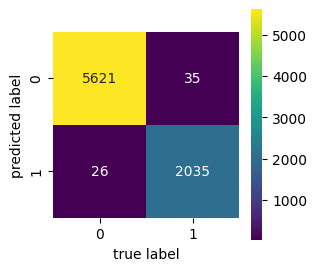

In [16]:
from sklearn.model_selection import GridSearchCV

# Base classifier
base_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, splitter='best',random_state=101)

# Create a Bagging Classifier
bca_model = BaggingClassifier(base_estimator=base_classifier,random_state=101)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object with the model and parameter grid
bca_grid_search = GridSearchCV(estimator=bca_model, param_grid=param_grid, cv=3, verbose=3)

# Train the model with the training data and perform hyperparameter search
bca_grid_search.fit(X_train, y_train)

# Best parameters
best_params = bca_grid_search.best_params_

# Best model with optimized parameters
best_model = bca_grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Prediction
bca_pred = bca_grid_search.predict(X_valid)

# Evaluation
print('Score:\n',bca_grid_search.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,bca_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,bca_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,bca_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.7 Gradient Boosting Classifier Algorithm

Accuracy: 99.261%
Score:
 0.9926137099909291 

Confusion Matrix:
 [[5620   36]
 [  21 2040]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



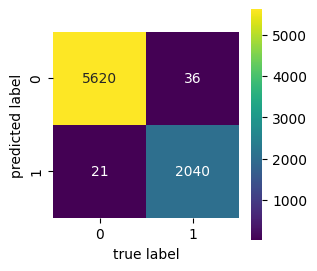

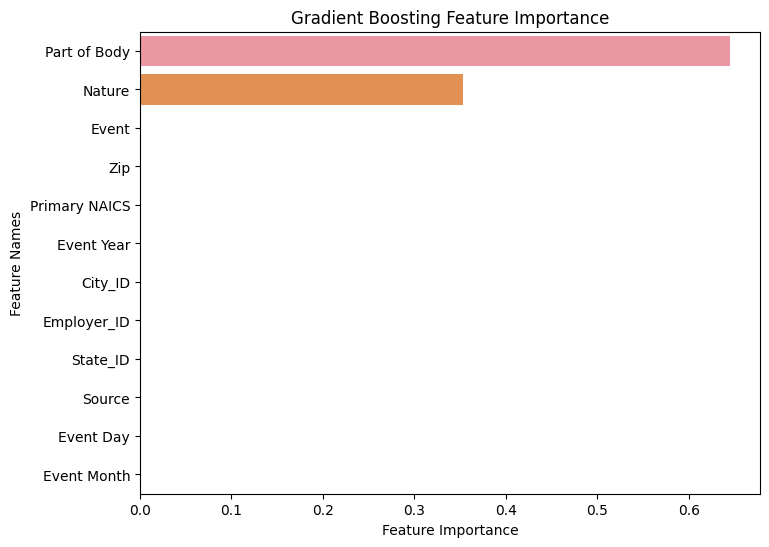

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = gbc.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',gbc.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

# Important features
plot_feature_importance(gbc.feature_importances_,X_train.columns,'Gradient Boosting')

#### 5.5.7.1 Hyperparameters For Gradient Boosting Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.992 total time=   4.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.991 total time=   5.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.992 total time=   4.3s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.991 total time=   9.5s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.991 total time=   8.7s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.991 total time=   9.5s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.991 total time=  13.8s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.990 total time=  14.9s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.991 total time=  14.1s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.991 total ti

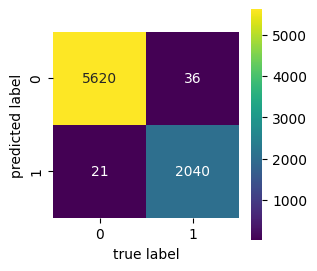

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search for parameter tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gb_grid_search.best_params_
best_score = gb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = GradientBoostingClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
gbc_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, gbc_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,gbc_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,gbc_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,gbc_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.8 XGboost Classifier

Accuracy: 99.248%
Score:
 0.9924841259556823 

Confusion Matrix:
 [[5620   36]
 [  22 2039]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



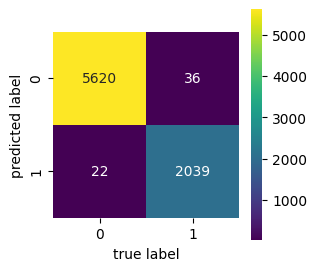

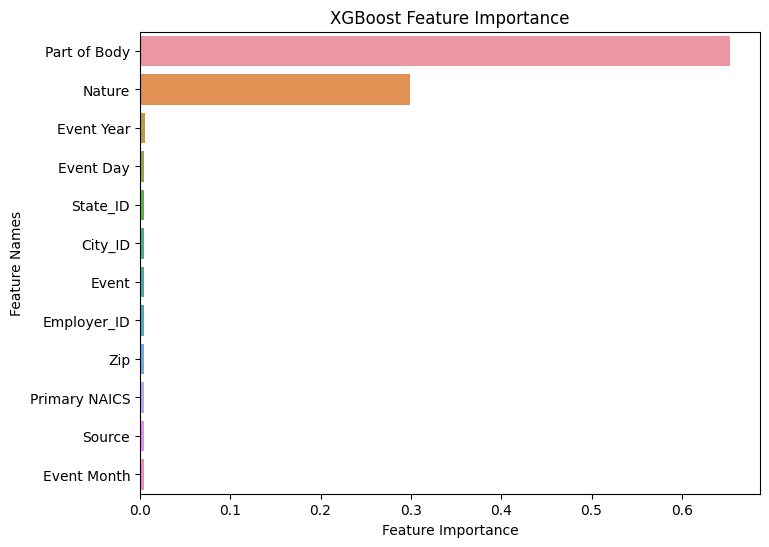

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb = xgb.XGBClassifier(random_state=101)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = xgb.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',xgb.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBoost')

#### 5.5.8.1 Hyperparameters For XGboost Classifier

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.992 total time=   6.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.991 total time=   7.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.991 total time=   1.6s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.992 total time=   2.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.991 total time=   2.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.992 total time=   2.1s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.992 total time=   4.9s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.991 total time=   3.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300;, score=0.992 total time=   3.2s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.992 total ti

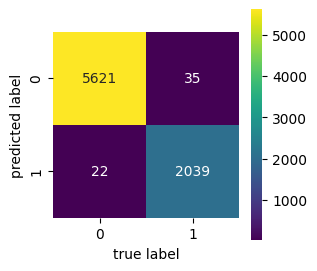

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for parameter tuning
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = xgb_grid_search.best_params_
best_score = xgb_grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
model_best = xgb.XGBClassifier(**best_params)
model_best.fit(X_train, y_train)

# Make predictions on the valid data
xgb_pred = model_best.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, xgb_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))

print('Score:\n',model_best.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,xgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,xgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,xgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.9 K Nearest Neighbors (KNN)

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.9.1 Algorithm Optimization: Find Best K

Text(0, 0.5, 'ERROR RATE')

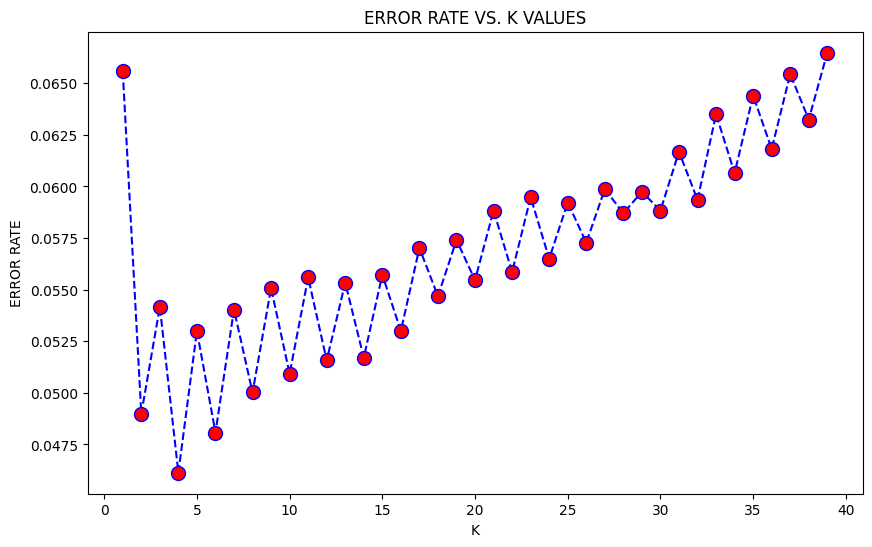

In [ ]:
# Optimize K
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_standard,y_train)
    pred_i = knn.predict(X_valid_standard)
    error_rate.append(np.mean(pred_i != y_valid))

# Plot error rate vs. K
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR RATE VS. K VALUES')
plt.xlabel('K')
plt.ylabel('ERROR RATE')

Score:
 0.9538680834521187 

Confusion Matrix:
 [[5401  255]
 [ 101 1960]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      5656
         1.0       0.88      0.95      0.92      2061

    accuracy                           0.95      7717
   macro avg       0.93      0.95      0.94      7717
weighted avg       0.96      0.95      0.95      7717



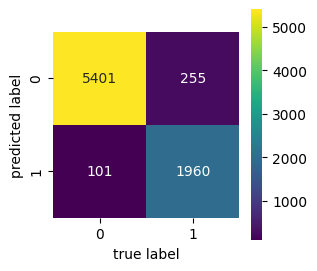

In [ ]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train model
knn.fit(X_train_standard,y_train)

# Prediction
knn_pred = knn.predict(X_valid_standard)

# Evaluation
print('Score:\n',knn.score(X_valid_standard,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,knn_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,knn_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,knn_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.10 Artificial Neural Networks (ANN)

Epoch 1/40
884/884 [==============================] - 4s 3ms/step - loss: 0.1965 - accuracy: 0.9342 - val_loss: 0.1071 - val_accuracy: 0.9640
Epoch 2/40
884/884 [==============================] - 2s 3ms/step - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0932 - val_accuracy: 0.9699
Epoch 3/40
884/884 [==============================] - 2s 3ms/step - loss: 0.0952 - accuracy: 0.9722 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 4/40
884/884 [==============================] - 2s 2ms/step - loss: 0.0902 - accuracy: 0.9749 - val_loss: 0.0821 - val_accuracy: 0.9721
Epoch 5/40
884/884 [==============================] - 2s 2ms/step - loss: 0.0862 - accuracy: 0.9772 - val_loss: 0.0766 - val_accuracy: 0.9760
Epoch 6/40
884/884 [==============================] - 2s 3ms/step - loss: 0.0832 - accuracy: 0.9792 - val_loss: 0.0776 - val_accuracy: 0.9765
Epoch 7/40
884/884 [==============================] - 3s 3ms/step - loss: 0.0786 - accuracy: 0.9811 - val_loss: 0.0756 - val_accuracy: 0.9807
Epoch 

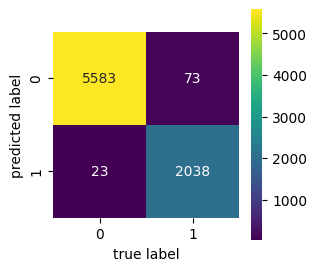

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_standard, y_train, epochs=40, batch_size=32, validation_data=(X_valid_standard, y_valid))

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_standard, y_valid)
print("Loss:", loss)
print("Accuracy:", accuracy)

ann_pred = model.predict(X_valid_standard) # Prediction
ann_pred = [1 if i >= 0.5 else 0 for i in ann_pred] # Binary prediction

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,ann_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,ann_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,ann_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.11 LightGBM

Accuracy: 0.9924841259556823
Confusion Matrix:
 [[5619   37]
 [  21 2040]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5656
         1.0       0.98      0.99      0.99      2061

    accuracy                           0.99      7717
   macro avg       0.99      0.99      0.99      7717
weighted avg       0.99      0.99      0.99      7717



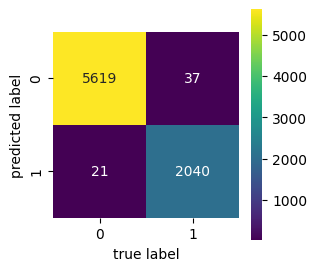

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Predict on the valid set
lgb_pred = model.predict(X_valid)
lgb_pred = np.round(lgb_pred)  # Convert probabilities to binary predictions

# Evaluation
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.11.1 Hyperparameters For LightGBM

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.992 total time=   6.0s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.991 total time=   4.1s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=31;, score=0.991 total time=   3.3s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.992 total time=   7.1s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.991 total time=   3.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=50;, score=0.991 total time=   6.8s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.991 total time=   9.0s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.991 total time=   6.8s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.05, num_leaves=100;, score=0.991 total time=   3.7s
[CV 1/3] END boosting_type=gbdt, lea

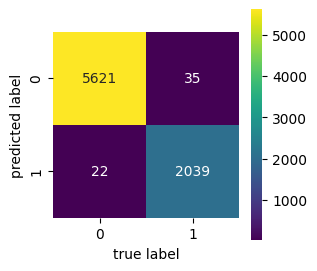

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Create the LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', **best_params)
best_model.fit(X_train, y_train)

# Predict on the valid set
lgb_pred = best_model.predict(X_valid)

# Evaluation
accuracy = accuracy_score(y_valid, lgb_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lgb_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lgb_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lgb_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5.5.12 Logistic Regression

Score:
 0.8222107036413114 

Confusion Matrix:
 [[4434 1222]
 [ 150 1911]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.78      0.87      5656
         1.0       0.61      0.93      0.74      2061

    accuracy                           0.82      7717
   macro avg       0.79      0.86      0.80      7717
weighted avg       0.87      0.82      0.83      7717



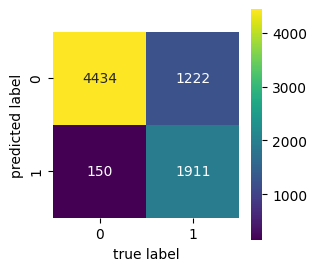

In [ ]:
# Create model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)

# Train model
lr.fit(X_train,y_train)

# Prediction
lr_pred = lr.predict(X_valid)

# Evaluation
print('Score:\n',lr.score(X_valid,y_valid),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 5.5.12.1 Hyperparameters For Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.839 total time=   0.2s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.849 total time=   0.2s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.846 total time=   0.2s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.843 total time=   0.3s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.861 total time=   0.2s
[CV 3/3] END ................C=0.01, penalty=l2;

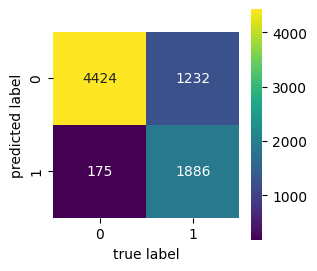

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid you want to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(random_state=101)

# Create an instance of GridSearchCV and fit it with your training data
grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy',verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the valid set
lr_pred = best_model.predict(X_valid)

# Evaluate of the model
accuracy = accuracy_score(y_valid, lr_pred)

# Print the best parameters, best score, and accuracy
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_valid,lr_pred),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_valid,lr_pred))

plt.figure(figsize=(3,3))
mat_T = confusion_matrix(y_valid,lr_pred)
sns.heatmap(mat_T, square=True, annot=True,fmt='d',cbar=True,cmap='viridis')
plt.xlabel('true label')
plt.ylabel('predicted label');

## 5.6 Comparing Algorithms With Balanced Train Dataset

In [ ]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
model_1 = DecisionTreeClassifier()
model_2 = RandomForestClassifier()
model_3 = SVC()
model_4 = GaussianNB()
model_5 = BernoulliNB()
model_6 = BaggingClassifier()
model_7 = GradientBoostingClassifier()
model_8 = xgb.XGBClassifier()
model_9 = KNeighborsClassifier()
model_10 = Sequential()
model_11 = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')
model_12 = LogisticRegression()

Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred


  fp, tp, th = roc_curve(y_valid, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_valid, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_valid, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
6,GradientBoostingClassifier,0.992640,0.992614,0.991723,0.992622
7,XGBClassifier,0.992636,0.992614,0.991569,0.992621
10,LGBMClassifier,0.992636,0.992614,0.991569,0.992621
1,RandomForestClassifier,0.992373,0.992355,0.991084,0.992361
5,BaggingClassifier,0.992241,0.992225,0.990841,0.992231
0,DecisionTreeClassifier,0.992110,0.992095,0.990598,0.992101
9,Sequential,0.987757,0.987560,0.987967,0.987607
3,GaussianNB,0.970588,0.970714,0.957662,0.970565
8,KNeighborsClassifier,0.955799,0.953868,0.952955,0.954380
2,SVC,0.902486,0.876247,0.897998,0.881274


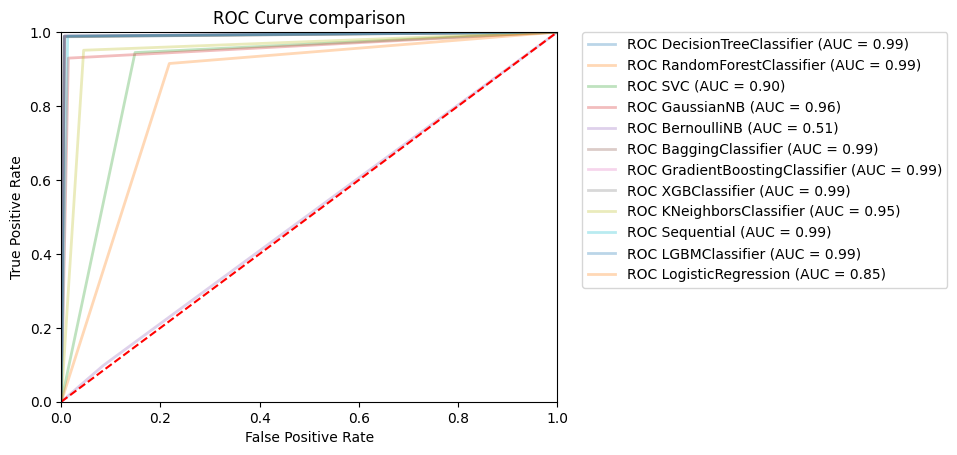

In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = dt_pred
  if alg == model_2:
    predicted = rf_pred
  if alg == model_3:
    predicted = svm_pred
  if alg == model_4:
    predicted = gnb_pred
  if alg == model_5:
    predicted = bnb_pred
  if alg == model_6:
    predicted = bca_pred
  if alg == model_7:
    predicted = gbc_pred
  if alg == model_8:
    predicted = xgb_pred
  if alg == model_9:
    predicted = knn_pred
  if alg == model_10:
    predicted = ann_pred
  if alg == model_11:
    predicted = lgb_pred
  if alg == model_12:
    predicted = lr_pred

  fp, tp, th = roc_curve(y_valid, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5.7 Testing Models With Balanced Training Dataset, Obtained Hyperparameters And Optimization of Features Based On Gradient Boosting Classifier Algorithm

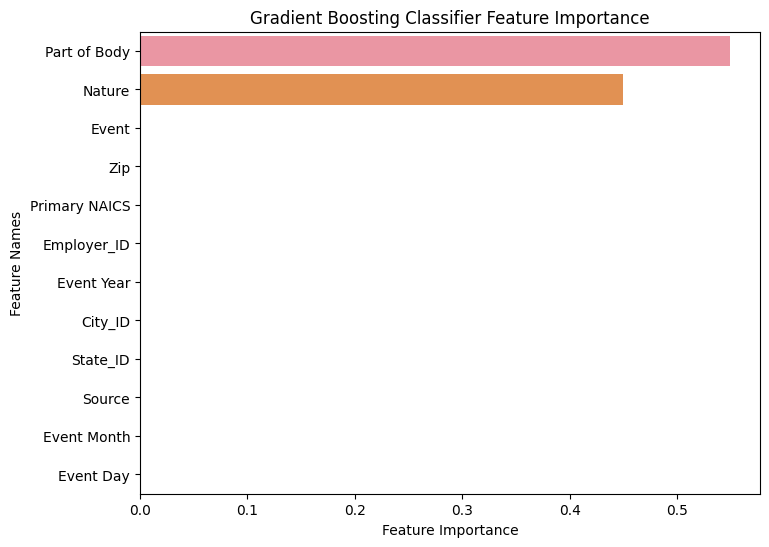

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=101, learning_rate=0.05, max_depth=4, n_estimators=100)
gbc.fit(X_train,y_train)
plot_feature_importance(gbc.feature_importances_,X_train.columns,'Gradient Boosting Classifier')

In [9]:
# Merge Training And Validation Datasets
X_trainValid = pd.concat([X_train,X_valid],axis=0)
y_trainValid = pd.concat([y_train,y_valid],axis=0)

# Features Optimization
X_trainValid = X_trainValid[['Nature','Part of Body','Event','Zip','Primary NAICS']]
X_test = X_test[['Nature','Part of Body','Event','Zip','Primary NAICS']]

### 5.7.1 Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create model
model_1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf = 2, splitter='best', random_state=101)

# Train model
model_1.fit(X_trainValid, y_trainValid)

# Prediction
pred_1 = model_1.predict(X_test)

# Evaluation
print('Score:\n',model_1.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_1),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_1))

Score:
 0.9926141885325559 

Confusion Matrix:
 [[11212    61]
 [   53  4109]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     11273
         1.0       0.99      0.99      0.99      4162

    accuracy                           0.99     15435
   macro avg       0.99      0.99      0.99     15435
weighted avg       0.99      0.99      0.99     15435



### 5.7.2 Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model_2 = RandomForestClassifier(max_depth=None, min_samples_leaf = 2, n_estimators=100, random_state=101)

# Train model
model_2.fit(X_trainValid, y_trainValid)

# Prediction
pred_2 = model_2.predict(X_test)

# Evaluation
print('Score:\n',model_2.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_2),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_2))

Score:
 0.9931324910916748 

Confusion Matrix:
 [[11213    60]
 [   46  4116]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11273
         1.0       0.99      0.99      0.99      4162

    accuracy                           0.99     15435
   macro avg       0.99      0.99      0.99     15435
weighted avg       0.99      0.99      0.99     15435



### 5.7.3 Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

# Create model
model_3 = SVC(random_state=101,C=100)

# Train model
model_3.fit(X_trainValid, y_trainValid)

# Prediction
pred_3 = model_3.predict(X_test)

# Evaluation
print('Score:\n',model_3.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_3),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_3))

Score:
 0.8875931324910917 

Confusion Matrix:
 [[10222  1051]
 [  684  3478]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     11273
         1.0       0.77      0.84      0.80      4162

    accuracy                           0.89     15435
   macro avg       0.85      0.87      0.86     15435
weighted avg       0.89      0.89      0.89     15435



### 5.7.4 Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

# Create model
model_4 = GaussianNB()

# Train model
model_4.fit(X_trainValid, y_trainValid)

# Prediction
pred_4 = model_4.predict(X_test)

# Evaluation
print('Score:\n',model_4.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_4),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_4))

Score:
 0.9684483317136379 

Confusion Matrix:
 [[11120   153]
 [  334  3828]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     11273
         1.0       0.96      0.92      0.94      4162

    accuracy                           0.97     15435
   macro avg       0.97      0.95      0.96     15435
weighted avg       0.97      0.97      0.97     15435



### 5.7.5 Bernoulli Naive Bayes

In [14]:
from sklearn.naive_bayes import BernoulliNB

# Create model
model_5 = BernoulliNB(alpha= 1000, binarize= 1.0)

# Train model
model_5.fit(X_trainValid, y_trainValid)

# Prediction
pred_5 = model_5.predict(X_test)

# Evaluation
print('Score:\n',model_5.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_5),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_5))

Score:
 0.7303530936183997 

Confusion Matrix:
 [[11273     0]
 [ 4162     0]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.84     11273
         1.0       0.00      0.00      0.00      4162

    accuracy                           0.73     15435
   macro avg       0.37      0.50      0.42     15435
weighted avg       0.53      0.73      0.62     15435



### 5.7.6 Bagging Classifier Algorithm

In [17]:
from sklearn.ensemble import BaggingClassifier

# Create model
model_6 = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, splitter='best',random_state=101),
                            random_state=101,max_samples=1.0,max_features=0.5,n_estimators=10)

# Train model
model_6.fit(X_trainValid, y_trainValid)

# Prediction
pred_6 = model_6.predict(X_test)

# Evaluation
print('Score:\n',model_6.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_6),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_6))

Score:
 0.9757693553611921 

Confusion Matrix:
 [[11133   140]
 [  234  3928]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     11273
         1.0       0.97      0.94      0.95      4162

    accuracy                           0.98     15435
   macro avg       0.97      0.97      0.97     15435
weighted avg       0.98      0.98      0.98     15435



### 5.7.7 Gradient Boosting Classifier Algorithm

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Create model
model_7 = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=100, random_state=101)

# Train model
model_7.fit(X_trainValid, y_trainValid)

# Prediction
pred_7 = model_7.predict(X_test)

# Evaluation
print('Score:\n',model_7.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_7),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_7))

Score:
 0.993002915451895 

Confusion Matrix:
 [[11212    61]
 [   47  4115]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11273
         1.0       0.99      0.99      0.99      4162

    accuracy                           0.99     15435
   macro avg       0.99      0.99      0.99     15435
weighted avg       0.99      0.99      0.99     15435



### 5.7.8 XGboost Classifier

In [19]:
import xgboost as xgb

# Create model
model_8 = xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=300 ,random_state=101)

# Train model
model_8.fit(X_trainValid, y_trainValid)

# Prediction
pred_8 = model_8.predict(X_test)

# Evaluation
print('Score:\n',model_8.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_8),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_8))

Score:
 0.9933916423712342 

Confusion Matrix:
 [[11213    60]
 [   42  4120]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11273
         1.0       0.99      0.99      0.99      4162

    accuracy                           0.99     15435
   macro avg       0.99      0.99      0.99     15435
weighted avg       0.99      0.99      0.99     15435



### 5.7.9 K Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_trainValid)
X_test_standard = scaler.transform(X_test)

# Create model
model_9 = KNeighborsClassifier(n_neighbors=4)

# Train model
model_9.fit(X_train_standard, y_trainValid)

# Prediction
pred_9 = model_9.predict(X_test_standard)

# Evaluation
print('Score:\n',model_9.score(X_test_standard,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_9),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_9))

Score:
 0.9812763200518303 

Confusion Matrix:
 [[11116   157]
 [  132  4030]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11273
         1.0       0.96      0.97      0.97      4162

    accuracy                           0.98     15435
   macro avg       0.98      0.98      0.98     15435
weighted avg       0.98      0.98      0.98     15435



### 5.7.10 Artificial Neural Networks (ANN)

In [21]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Standardize features
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_trainValid)
X_test_standard = scaler.transform(X_test)

# Define the ANN model
model_10 = Sequential()
model_10.add(Dense(64, activation='relu', input_dim=X_train_standard.shape[1]))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dense(1, activation='sigmoid'))

# Compile the model
model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_10.fit(X_train_standard, y_trainValid, epochs=40, batch_size=32, validation_data=(X_test_standard, y_test))

# Predictions
pred_10 = model_10.predict(X_test_standard)
pred_10 = [1 if i >= 0.5 else 0 for i in pred_10] # Binary prediction

# Evaluation
accuracy = accuracy_score(y_test, pred_10)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_10),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_10))

Epoch 1/40
1930/1930 [==============================] - 7s 3ms/step - loss: 0.1105 - accuracy: 0.9626 - val_loss: 0.0779 - val_accuracy: 0.9776
Epoch 2/40
1930/1930 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9757 - val_loss: 0.0726 - val_accuracy: 0.9806
Epoch 3/40
1930/1930 [==============================] - 5s 3ms/step - loss: 0.0719 - accuracy: 0.9814 - val_loss: 0.0644 - val_accuracy: 0.9841
Epoch 4/40
1930/1930 [==============================] - 8s 4ms/step - loss: 0.0678 - accuracy: 0.9838 - val_loss: 0.0639 - val_accuracy: 0.9820
Epoch 5/40
1930/1930 [==============================] - 8s 4ms/step - loss: 0.0639 - accuracy: 0.9858 - val_loss: 0.0594 - val_accuracy: 0.9867
Epoch 6/40
1930/1930 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9860 - val_loss: 0.0586 - val_accuracy: 0.9870
Epoch 7/40
1930/1930 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9863 - val_loss: 0.0561 - val_accuracy:

### 5.7.11 LightGBM

In [22]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create the LightGBM dataset
train_data = lgb.Dataset(X_trainValid, label=y_trainValid)

params = {
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.2,
}

# Train the LightGBM model
model_11 = lgb.train(params, train_data, num_boost_round=100)

# Predict on the test set
pred_11 = model_11.predict(X_test)
pred_11 = np.round(pred_11)

# Evaluation
accuracy = accuracy_score(y_test, pred_11)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_11),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_11))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 61737, number of used features: 5
[LightGBM] [Info] Start training from score 0.262274
Accuracy: 0.993067703271785
Confusion Matrix:
 [[11212    61]
 [   46  4116]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11273
         1.0       0.99      0.99      0.99      4162

    accuracy                           0.99     15435
   macro avg       0.99      0.99      0.99     15435
weighted avg       0.99      0.99      0.99     15435



### 5.7.12 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Create model
model_12 = LogisticRegression(random_state=101, C=0.1, penalty= 'l2')

# Train model
model_12.fit(X_trainValid, y_trainValid)

# Prediction
pred_12 = model_12.predict(X_test)

# Evaluation
print('Score:\n',model_12.score(X_test,y_test),'\n')

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test,pred_12),'\n')

from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,pred_12))

Score:
 0.8169744088111435 

Confusion Matrix:
 [[9937 1336]
 [1489 2673]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     11273
         1.0       0.67      0.64      0.65      4162

    accuracy                           0.82     15435
   macro avg       0.77      0.76      0.76     15435
weighted avg       0.81      0.82      0.82     15435



## 5.8 Comparing Algorithms

In [24]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, auc, accuracy_score
Algorithm = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]

Algorithm_columns = []
Algorithm_compare = pd.DataFrame(columns = Algorithm_columns)

row_index = 0
for alg in Algorithm:
  index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = pred_1
  if alg == model_2:
    predicted = pred_2
  if alg == model_3:
    predicted = pred_3
  if alg == model_4:
    predicted = pred_4
  if alg == model_5:
    predicted = pred_5
  if alg == model_6:
    predicted = pred_6
  if alg == model_7:
    predicted = pred_7
  if alg == model_8:
    predicted = pred_8
  if alg == model_9:
    predicted = pred_9
  if alg == model_10:
    predicted = pred_10
  if alg == model_11:
    predicted = pred_11
  if alg == model_12:
    predicted = pred_12

  fp, tp, th = roc_curve(y_test, predicted)
  Algorithm_name = alg.__class__.__name__
  Algorithm_compare.loc[row_index,'Algorithm used'] = Algorithm_name
  Algorithm_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted,average='weighted')
  Algorithm_compare.loc[row_index, 'AUC'] = auc(fp, tp)
  Algorithm_compare.loc[row_index, 'F1-Score'] = f1_score(y_test, predicted,average='weighted')

  row_index+=1

Algorithm_compare.sort_values(by = ['F1-Score'], ascending = False, inplace = True)
Algorithm_compare

,Algorithm used,Precission,Recall,AUC,F1-Score
7,XGBClassifier,0.993404,0.993392,0.992293,0.993396
1,RandomForestClassifier,0.993142,0.993132,0.991813,0.993136
10,Booster,0.993078,0.993068,0.991768,0.993072
6,GradientBoostingClassifier,0.993012,0.993003,0.991648,0.993007
0,DecisionTreeClassifier,0.992619,0.992614,0.990927,0.992616
9,Sequential,0.988696,0.988533,0.988891,0.988571
8,KNeighborsClassifier,0.981318,0.981276,0.977179,0.981294
5,BaggingClassifier,0.975685,0.975769,0.965679,0.975681
3,GaussianNB,0.968340,0.968448,0.953089,0.968223
2,SVC,0.891620,0.887593,0.871212,0.889036


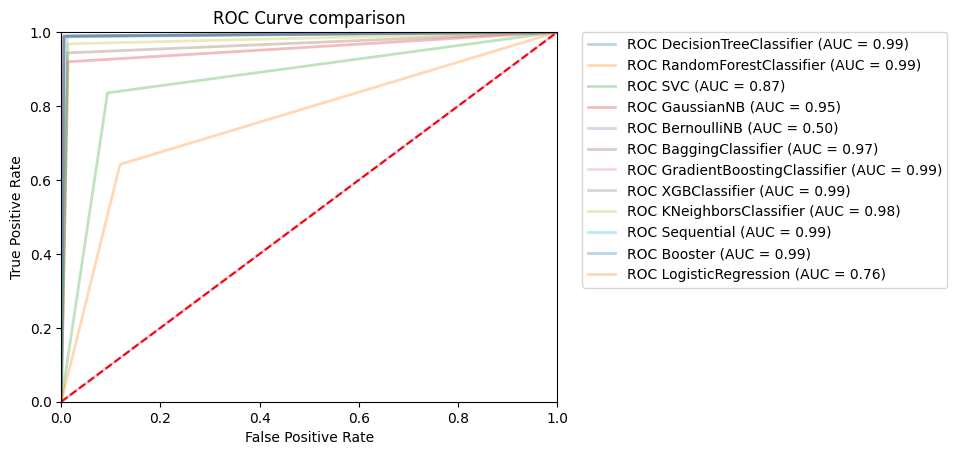

In [25]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in Algorithm:
  if alg == model_1:
    predicted = pred_1
  if alg == model_2:
    predicted = pred_2
  if alg == model_3:
    predicted = pred_3
  if alg == model_4:
    predicted = pred_4
  if alg == model_5:
    predicted = pred_5
  if alg == model_6:
    predicted = pred_6
  if alg == model_7:
    predicted = pred_7
  if alg == model_8:
    predicted = pred_8
  if alg == model_9:
    predicted = pred_9
  if alg == model_10:
    predicted = pred_10
  if alg == model_11:
    predicted = pred_11
  if alg == model_12:
    predicted = pred_12

  fp, tp, th = roc_curve(y_test, predicted)
  roc_auc_mla = auc(fp, tp)
  Algorithm_name = alg.__class__.__name__
  plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (Algorithm_name, roc_auc_mla))

  index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# End Of Part 3